# Naive Bayes

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Model Training
from sklearn.naive_bayes import GaussianNB
# No input parameters are specified although probabilities could be specified
# a priori other than those that are directly inferred from the train data.
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

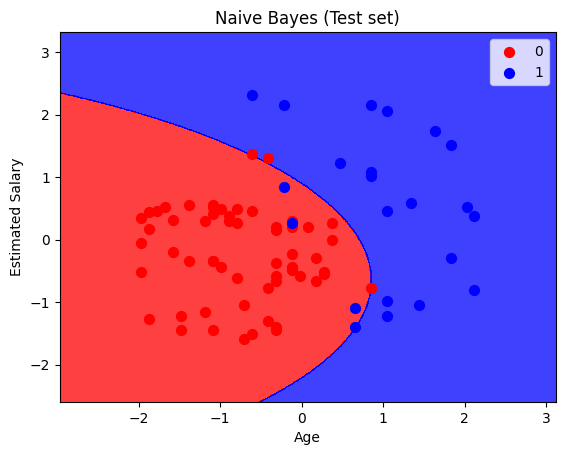

In [8]:
### Visualization
# Decision Frontier
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Data as Series
y_test_s = pd.Series(y_test)
target_names=['0','1']

# Index of the labels
idxPlus=y_test_s[y_test_s==0].index
idxMin=y_test_s[y_test_s==1].index

# Visualization for the data points
plt.scatter(X_test[idxPlus,0],X_test[idxPlus,1],c='r',s=50, label='0')
plt.scatter(X_test[idxMin,0],X_test[idxMin,1],c='b',s=50, label='1')

plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()